In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import sys
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from nets import *
from cfgs import *
from data import *
from trainer import *

In [2]:
%matplotlib inline
save_plot = False
plt.rcParams.update({'font.size': 10, 'axes.labelsize': 'x-large'})
D = 201

x = np.linspace(0, 1.0, D)
X_tst = np.stack([v.flatten() for v in np.meshgrid(x,x)], axis = -1)
print(X_tst.shape)

cfg = unit_1x2_uniform_config.cfg
cfg.test.batch_size = D
cfg.test.num_batches = int(X_tst.shape[0]/cfg.test.batch_size)
cfg.test.save_output = True

(40401, 2)


In [3]:
Net = unit_net.Net
Generator = uniform_01_generator.Generator
Trainer = trainer.Trainer

In [4]:
net = Net(cfg, "test")
generator = Generator(cfg, 'test', X_tst)
m = Trainer(cfg, "test", net)
m.test(generator)

INFO:tensorflow:Restoring parameters from experiments/unit_1x2_uniform/model-400000


2019-01-30 01:07:25,476:INFO:Restoring parameters from experiments/unit_1x2_uniform/model-400000
2019-01-30 01:07:29,031:INFO:TEST BATCH-0: t = 3.5205, Net_Loss: -0.246150, Revenue: 0.246150
2019-01-30 01:07:29,035:INFO:TEST BATCH-1: t = 3.5224, Net_Loss: -0.246150, Revenue: 0.246150
2019-01-30 01:07:29,039:INFO:TEST BATCH-2: t = 3.5243, Net_Loss: -0.246150, Revenue: 0.246150
2019-01-30 01:07:29,043:INFO:TEST BATCH-3: t = 3.5262, Net_Loss: -0.246150, Revenue: 0.246150
2019-01-30 01:07:29,047:INFO:TEST BATCH-4: t = 3.5281, Net_Loss: -0.246150, Revenue: 0.246150
2019-01-30 01:07:29,051:INFO:TEST BATCH-5: t = 3.5300, Net_Loss: -0.246150, Revenue: 0.246150
2019-01-30 01:07:29,056:INFO:TEST BATCH-6: t = 3.5328, Net_Loss: -0.246150, Revenue: 0.246150
2019-01-30 01:07:29,061:INFO:TEST BATCH-7: t = 3.5350, Net_Loss: -0.246150, Revenue: 0.246150
2019-01-30 01:07:29,065:INFO:TEST BATCH-8: t = 3.5371, Net_Loss: -0.246150, Revenue: 0.246150
2019-01-30 01:07:29,069:INFO:TEST BATCH-9: t = 3.5391, Ne

2019-01-30 01:07:29,459:INFO:TEST BATCH-86: t = 3.8046, Net_Loss: -0.246150, Revenue: 0.246150
2019-01-30 01:07:29,463:INFO:TEST BATCH-87: t = 3.8079, Net_Loss: -0.246150, Revenue: 0.246150
2019-01-30 01:07:29,468:INFO:TEST BATCH-88: t = 3.8115, Net_Loss: -0.246150, Revenue: 0.246150
2019-01-30 01:07:29,476:INFO:TEST BATCH-89: t = 3.8193, Net_Loss: -0.246150, Revenue: 0.246150
2019-01-30 01:07:29,483:INFO:TEST BATCH-90: t = 3.8221, Net_Loss: -0.246150, Revenue: 0.246150
2019-01-30 01:07:29,487:INFO:TEST BATCH-91: t = 3.8251, Net_Loss: -0.246150, Revenue: 0.246150
2019-01-30 01:07:29,492:INFO:TEST BATCH-92: t = 3.8276, Net_Loss: -0.246150, Revenue: 0.246150
2019-01-30 01:07:29,496:INFO:TEST BATCH-93: t = 3.8306, Net_Loss: -0.246150, Revenue: 0.246150
2019-01-30 01:07:29,500:INFO:TEST BATCH-94: t = 3.8334, Net_Loss: -0.246150, Revenue: 0.246150
2019-01-30 01:07:29,504:INFO:TEST BATCH-95: t = 3.8365, Net_Loss: -0.246150, Revenue: 0.246150
2019-01-30 01:07:29,508:INFO:TEST BATCH-96: t = 3.

2019-01-30 01:07:29,880:INFO:TEST BATCH-172: t = 4.1277, Net_Loss: -0.572546, Revenue: 0.572546
2019-01-30 01:07:29,888:INFO:TEST BATCH-173: t = 4.1344, Net_Loss: -0.572568, Revenue: 0.572568
2019-01-30 01:07:29,892:INFO:TEST BATCH-174: t = 4.1373, Net_Loss: -0.572591, Revenue: 0.572591
2019-01-30 01:07:29,897:INFO:TEST BATCH-175: t = 4.1420, Net_Loss: -0.572613, Revenue: 0.572613
2019-01-30 01:07:29,900:INFO:TEST BATCH-176: t = 4.1443, Net_Loss: -0.572635, Revenue: 0.572635
2019-01-30 01:07:29,905:INFO:TEST BATCH-177: t = 4.1481, Net_Loss: -0.572658, Revenue: 0.572658
2019-01-30 01:07:29,910:INFO:TEST BATCH-178: t = 4.1524, Net_Loss: -0.572680, Revenue: 0.572680
2019-01-30 01:07:29,915:INFO:TEST BATCH-179: t = 4.1562, Net_Loss: -0.572703, Revenue: 0.572703
2019-01-30 01:07:29,920:INFO:TEST BATCH-180: t = 4.1604, Net_Loss: -0.572725, Revenue: 0.572725
2019-01-30 01:07:29,924:INFO:TEST BATCH-181: t = 4.1640, Net_Loss: -0.572747, Revenue: 0.572747
2019-01-30 01:07:29,928:INFO:TEST BATCH-

In [5]:
alloc = np.load(os.path.join(cfg.dir_name, "alloc_tst_" + str(cfg.test.restore_iter) + ".npy")).reshape(D,D,2)

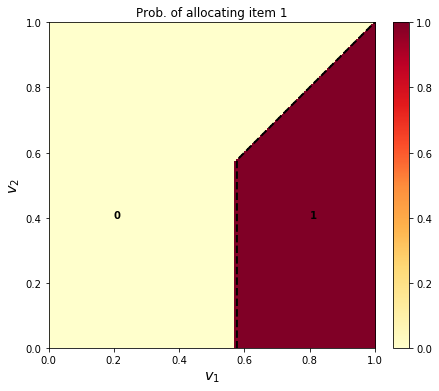

In [6]:
x1 = np.sqrt(1.0/3.0)
points = [(x1, 0), (x1, x1), (1.0, 1.0)]

x = list(map(lambda x: x[0], points))
y = list(map(lambda x: x[1], points))

fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize=(8,6))

plt.plot(x, y, linewidth = 2, linestyle = '--', c='black')
img = ax.imshow(alloc[::-1, :, 0], extent=[0,1,0,1], vmin = 0.0, vmax=1.0, cmap = 'YlOrRd')
                    
plt.text(0.2, 0.4, s='0', color='black', fontsize='10', fontweight='bold')
plt.text(0.8, 0.4, s='1', color='black', fontsize='10', fontweight='bold')

ax.set_xlabel('$v_1$')
ax.set_ylabel('$v_2$')
plt.title('Prob. of allocating item 1')
plt.colorbar(img, fraction=0.046, pad=0.04)

if save_plot:
    fig.set_size_inches(4, 3)
    plt.savefig(os.path.join(cfg.dir_name, 'alloc1.pdf'), bbox_inches = 'tight', pad_inches = 0.05)

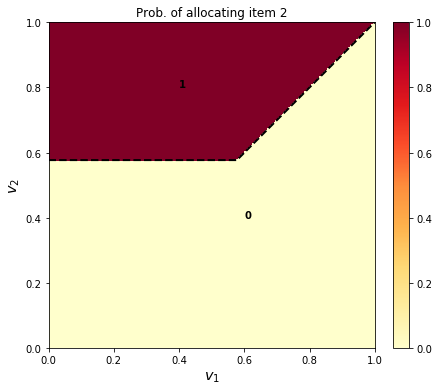

In [7]:
x1 = np.sqrt(1.0/3.0)
points = [(0.0, x1), (x1, x1), (1.0, 1.0)]

x = list(map(lambda x: x[0], points))
y = list(map(lambda x: x[1], points))


plt.rcParams.update({'font.size': 10, 'axes.labelsize': 'x-large'})
fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize=(8,6))

plt.plot(x, y, linewidth = 2, linestyle = '--', c='black')
img = ax.imshow(alloc[::-1, :, 1], extent=[0,1,0,1], vmin = 0.0, vmax=1.0, cmap = 'YlOrRd')
              
plt.text(0.6, 0.4, s='0', color='black', fontsize='10', fontweight='bold')
plt.text(0.4, 0.8, s='1', color='black', fontsize='10', fontweight='bold')
    
ax.set_xlabel('$v_1$')
ax.set_ylabel('$v_2$')
plt.title('Prob. of allocating item 2')
plt.colorbar(img, fraction=0.046, pad=0.04)

if save_plot:
    fig.set_size_inches(4, 3)
    plt.savefig(os.path.join(cfg.dir_name, 'alloc2.pdf'), bbox_inches = 'tight', pad_inches = 0.05)